In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

In [3]:
data_no_tx = pd.read_csv('Dataset/data_no_tx.csv')
data_tx = pd.read_csv('Dataset/data_tx.csv')

In [4]:
#Split data into training,testing and validation sets (training_tx,testing_tx,validation_tx)

lab_enc_tx = preprocessing.MinMaxScaler(feature_range=(0,1))
lab_enc_no_tx = preprocessing.MinMaxScaler(feature_range=(0,1))

data_tx_columns = data_tx.columns
data_no_tx_columns = data_no_tx.columns


data_tx = lab_enc_tx.fit_transform(data_tx.values)
data_no_tx = lab_enc_no_tx.fit_transform(data_no_tx.values)

data_tx = pd.DataFrame(data_tx,columns=data_tx_columns)
data_no_tx = pd.DataFrame(data_no_tx,columns=data_no_tx_columns)

train_tx, testing_tx = train_test_split(data_tx.copy(), test_size=0.2, random_state=1)
training_tx, validation_tx = train_test_split(train_tx.copy(), test_size=0.2, random_state=1)

train_no_tx, testing_no_tx = train_test_split(data_no_tx.copy(), test_size=0.2, random_state=1)
training_no_tx, validation_no_tx = train_test_split(train_no_tx.copy(), test_size=0.2, random_state=1)



# training_tx.shape, testing_tx.shape, validation_tx.shape, training_no_tx.shape, testing_no_tx.shape, validation_no_tx.shape
# print(data_tx)

In [5]:
def KNeighbors(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    
    acc_train_knn = []
    acc_val_knn = [] 

    for i in range(2, 53):
        if multiple_outputs:
            knn = MultiOutputRegressor(KNeighborsRegressor(n_neighbors = i, n_jobs=-1))
        else:
            knn = KNeighborsRegressor(n_neighbors = i, n_jobs=-1)
            
        knn.fit(encoded_x, encoded_y)
        acc_knn = round(knn.score(encoded_x, encoded_y) * 100, 2)

        Y_pred = knn.predict(encoded_v)

        acc_knn_val = round(r2_score(v_features, Y_pred)*100, 2)

        acc_train_knn.append(acc_knn)
        acc_val_knn.append(acc_knn_val)
    
    return acc_train_knn,acc_val_knn
    

In [6]:
def LogisticRegres(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    if multiple_outputs:
        logreg = MultiOutputRegressor(LogisticRegression(max_iter=1000))
    else:
        logreg = LogisticRegression(max_iter=1000)
    logreg.fit(encoded_x, encoded_y)
    acc_log = round(logreg.score(encoded_x, encoded_y)*100, 2)

    Y_pred = logreg.predict(encoded_v)

    acc_logVal = round(r2_score(v_features, Y_pred)*100, 2)
    
    return acc_log, acc_logVal
    

In [7]:
def Guassian(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    if multiple_outputs:
        gaussian = MultiOutputRegressor(GaussianNB())
    else:
        gaussian = GaussianNB()
    gaussian.fit(encoded_x, encoded_y)
    acc_gaussian = round(gaussian.score(encoded_x, encoded_y) * 100, 2)

    Y_pred = gaussian.predict(encoded_v)

    acc_gaussian_val = round(accuracy_score(v_features, Y_pred)*100, 2)
    
    return acc_gaussian,acc_gaussian_val

In [8]:
def Percep(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    if multiple_outputs:
        perceptron = MultiOutputRegressor(Perceptron(max_iter=1000))
    else:
        perceptron = Perceptron(max_iter=1000)
    
    perceptron.fit(encoded_x, encoded_y)
    acc_perceptron = round(perceptron.score(encoded_x, encoded_y) * 100, 2)

    Y_pred = perceptron.predict(encoded_v)

    acc_perceptron_val = round(accuracy_score(v_features, Y_pred)*100, 2)
    
    return acc_perceptron,acc_perceptron_val

In [9]:
def LSVC(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    if multiple_outputs:
        linear_svc = MultiOutputRegressor(LinearSVC(max_iter=1000))
    else:
        linear_svc = LinearSVC(max_iter=1000)
    linear_svc.fit(encoded_x, encoded_y)

    acc_linear_svc = round(linear_svc.score(encoded_x, encoded_y) * 100, 2)

    Y_pred = linear_svc.predict(encoded_v)

    acc_linear_svc_val = round(accuracy_score(v_features, Y_pred)*100, 2)
    
    return acc_linear_svc,acc_linear_svc_val

In [10]:
def DecisionTree(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):

    acc_decision_tree_val_arr = []
    acc_decision_tree_train = []

    for i in range(1, 30):
        if multiple_outputs:
            decision_tree = MultiOutputRegressor(DecisionTreeRegressor(max_depth=i))
        else:
            decision_tree = DecisionTreeRegressor(max_depth=i)
        decision_tree.fit(encoded_x, encoded_y)

        acc_decision_tree = round(decision_tree.score(encoded_x, encoded_y) * 100, 2)

        Y_pred = decision_tree.predict(encoded_v)

        acc_decision_tree_val = round(r2_score(v_features, Y_pred)*100, 2)

        acc_decision_tree_val_arr.append(acc_decision_tree_val)
        acc_decision_tree_train.append(acc_decision_tree)

    return acc_decision_tree_train,acc_decision_tree_val_arr

In [11]:
def RandomForest(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    
    arr_random_forest_train = []
    arr_random_forest_val = []

    for i in range(1, 30):
        if multiple_outputs:
            random_forest = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=i, n_jobs=-1))
        else:
            random_forest = RandomForestRegressor(n_estimators=100, max_depth=i, n_jobs=-1)

        random_forest.fit(encoded_x, encoded_y)

        acc_random_forest = round(random_forest.score(encoded_x, encoded_y) * 100, 2)

        Y_pred = random_forest.predict(encoded_v)

        acc_random_forest_train = round(r2_score(v_features, Y_pred)*100, 2)
        arr_random_forest_train.append(acc_random_forest)
        arr_random_forest_val.append(acc_random_forest_train)
        
    return arr_random_forest_train,arr_random_forest_val

In [12]:
def GradientBoosting(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    if multiple_outputs:
        gradientBoostingClassifier = MultiOutputRegressor(GradientBoostingRegressor())
    else:
        gradientBoostingClassifier = GradientBoostingRegressor()
    gradientBoostingClassifier.fit(encoded_x, encoded_y)

    acc_gradient_boosting = round(gradientBoostingClassifier.score(encoded_x, encoded_y) * 100, 2)

    Y_pred = gradientBoostingClassifier.predict(encoded_v)

    acc_gradientBoosting_val = round(r2_score(v_features, Y_pred) * 100,2)
    return acc_gradient_boosting,acc_gradientBoosting_val

In [13]:
def LinRegression(encoded_x,encoded_y,encoded_v,v_features,multiple_outputs):
    if multiple_outputs:
        linear_regression = MultiOutputRegressor(LinearRegression(n_jobs=-1))
    else:
        linear_regression = LinearRegression(n_jobs=-1)
    linear_regression.fit(encoded_x, encoded_y)
    acc_linear_regression = round(linear_regression.score(encoded_x, encoded_y)*100, 2)

    Y_pred = linear_regression.predict(encoded_v)

    acc_linear_regression_val = round(r2_score(v_features, Y_pred)*100, 2)

    return acc_linear_regression,acc_linear_regression_val

In [14]:
#Have latency and energy consumption & (Throughput) as target values to be predicted

#TODO : check what to do with active_timer, output needs to be only one.

#Training Data Tx
training_features_tx = training_tx[['energyConsumption','Throughput','ms']]
training_features_ms_tx = training_tx['ms'].round(2).astype(int)
training_features_energy_tx = training_tx['energyConsumption'].round(2).astype(int)
training_features_throughput_tx = training_tx['Throughput'].round(2).astype(int)
training_tx.drop(columns=['energyConsumption','Throughput','ms'],axis=0,inplace=True)
training_input_tx = training_tx

#Testing Data Tx
testing_features_tx = testing_tx[['energyConsumption','Throughput','ms']]
testing_features_ms_tx = testing_tx['ms'].round(2).astype(int)
testing_features_energy_tx = testing_tx['energyConsumption'].round(2).astype(int)
testing_features_throughput_tx = testing_tx['Throughput'].round(2).astype(int)
testing_tx.drop(columns=['energyConsumption','Throughput','ms'],axis=0,inplace=True)
testing_input_tx = testing_tx

#Validation Data Tx
validation_features_tx = validation_tx[['energyConsumption','Throughput','ms']]
validation_features_ms_tx = validation_tx['ms'].round(2).astype(int)
validation_features_energy_tx = validation_tx['energyConsumption'].round(2).astype(int)
validation_features_throughput_tx = validation_tx['Throughput'].round(2).astype(int)
validation_tx.drop(columns=['energyConsumption','Throughput','ms'],axis=0,inplace=True)
validation_input_tx = validation_tx

#Training Data No Tx
training_features_no_tx = training_no_tx[['energyConsumption','ms']]
training_features_ms_no_tx = training_no_tx['ms'].round(2).astype(int)
training_features_energy_no_tx = training_no_tx['energyConsumption'].round(2).astype(int)
training_no_tx.drop(columns=['energyConsumption','ms'],axis=0,inplace=True)
training_input_no_tx = training_no_tx

#Testing Data No Tx
testing_features_no_tx = testing_no_tx[['energyConsumption','ms']]
testing_features_ms_no_tx = testing_no_tx['ms'].round(2).astype(int)
testing_features_energy_no_tx = testing_no_tx['energyConsumption'].round(2).astype(int)
testing_no_tx.drop(columns=['energyConsumption','ms'],axis=0,inplace=True)
testing_input_no_tx = testing_no_tx

#Validation Data No Tx
validation_features_no_tx = validation_no_tx[['energyConsumption','ms']]
validation_features_ms_no_tx = validation_no_tx['ms'].round(2).astype(int)
validation_features_energy_no_tx = validation_no_tx['energyConsumption'].round(2).astype(int)
validation_no_tx.drop(columns=['energyConsumption','ms'],axis=0,inplace=True)
validation_input_no_tx = validation_no_tx

In [15]:
#PreProcess the Data to Categorical Values instead of Continuos Values

#TODO

# lab_enc = preprocessing.MinMaxScaler(feature_range=(0,1))

#Energy Consumption No Tx

ec_no_tx_x = training_input_no_tx.values
ec_no_tx_y = training_features_energy_no_tx.values
validation_ec_no_tx_x = validation_input_no_tx.values
validation_ec_no_tx_y = validation_features_energy_no_tx.values

#Delay No Tx

ms_no_tx_x = training_input_no_tx.values
ms_no_tx_y = training_features_ms_no_tx.values
validation_ms_no_tx_x = validation_input_no_tx.values
validation_ms_no_tx_y = validation_features_ms_no_tx.values

#Energy Consumption Tx

ec_tx_x = training_input_tx.values
ec_tx_y = training_features_energy_tx.values
validation_ec_tx_x = validation_input_tx.values
validation_ec_tx_y = validation_features_energy_tx.values

#Delay Tx

ms_tx_x = training_input_tx.values
ms_tx_y = training_features_ms_tx.values
validation_ms_tx_x = validation_input_tx.values
validation_ms_tx_y = validation_features_ms_tx.values

#Throughput Tx

tp_tx_x = training_input_tx.values
tp_tx_y = training_features_throughput_tx.values
validation_tp_tx_x = validation_input_tx.values
validation_tp_tx_y = validation_features_throughput_tx.values

#Multi Outputs Tx

tx_x = training_input_tx.values
tx_y = training_features_tx.values
validation_tx_x = validation_input_tx.values
validation_tx_y = validation_features_tx.values

#Multi Outputs No Tx

no_tx_x = training_input_no_tx.values
no_tx_y = training_features_no_tx.values
validation_no_tx_x = validation_input_no_tx.values
validation_no_tx_y = validation_features_no_tx.values


Training Accuracy (Ec Tx):  24.97
Validation Accuracy (Ec Tx):  100.0


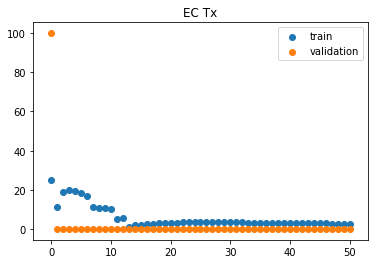

Training Accuracy (Throughput Tx):  74.99
Validation Accuracy (Throughput Tx):  100.0


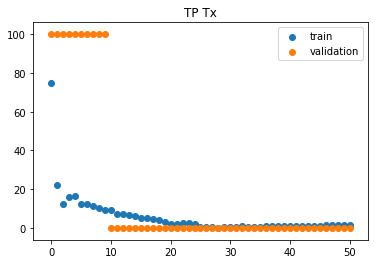

Training Accuracy (Delay Tx):  24.97
Validation Accuracy (Delay Tx):  100.0


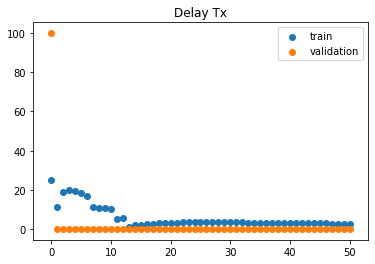

Training Accuracy (Ec No Tx):  50.0
Validation Accuracy(Ec No Tx):  100.0


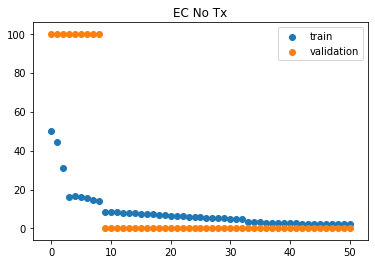

Training Accuracy (Delay No Tx):  28.12
Validation Accuracy (Delay No Tx):  100.0


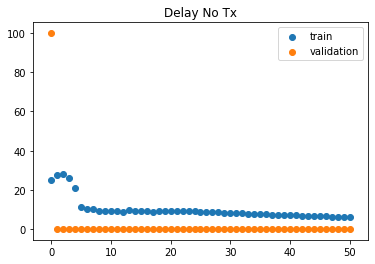

In [16]:
#K-Neighbors

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = KNeighbors(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",max(ec_tx_acc_train))
print("Validation Accuracy (Ec Tx): ",max(ec_tx_acc_val))

plt.title('EC Tx')
plt.scatter(list(range(len(ec_tx_acc_train))),ec_tx_acc_train,label="train")
plt.scatter(list(range(len(ec_tx_acc_val))),ec_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()


#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = KNeighbors(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",max(tp_tx_acc_train))
print("Validation Accuracy (Throughput Tx): ",max(tp_tx_acc_val))     

plt.title('TP Tx')
plt.scatter(list(range(len(tp_tx_acc_train))),tp_tx_acc_train,label="train")
plt.scatter(list(range(len(tp_tx_acc_val))),tp_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = KNeighbors(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",max(ms_tx_acc_train))
print("Validation Accuracy (Delay Tx): ",max(ms_tx_acc_val))

plt.title('Delay Tx')
plt.scatter(list(range(len(ms_tx_acc_train))),ms_tx_acc_train,label="train")
plt.scatter(list(range(len(ms_tx_acc_val))),ms_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()
      

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = KNeighbors(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",max(ec_no_tx_acc_train))
print("Validation Accuracy(Ec No Tx): ",max(ec_no_tx_acc_val))

plt.title('EC No Tx')
plt.scatter(list(range(len(ec_no_tx_acc_train))),ec_no_tx_acc_train,label="train")
plt.scatter(list(range(len(ec_no_tx_acc_val))),ec_no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = KNeighbors(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",max(ms_no_tx_acc_train))
print("Validation Accuracy (Delay No Tx): ",max(ms_no_tx_acc_val))

plt.title('Delay No Tx')
plt.scatter(list(range(len(ms_no_tx_acc_train))),ms_no_tx_acc_train,label="train")
plt.scatter(list(range(len(ms_no_tx_acc_val))),ms_no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()


In [17]:
#Logistic Regression 

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = LogisticRegres(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",ec_tx_acc_train)
print("Validation Accuracy (Ec Tx): ",ec_tx_acc_val)

#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = LogisticRegres(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",tp_tx_acc_train)
print("Validation Accuracy (Throughput Tx): ",tp_tx_acc_val)      
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = LogisticRegres(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",ms_tx_acc_train)
print("Validation Accuracy (Delay Tx): ",ms_tx_acc_val)

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = LogisticRegres(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",ec_no_tx_acc_train)
print("Validation Accuracy(Ec No Tx): ",ec_no_tx_acc_val)

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = LogisticRegres(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",ms_no_tx_acc_train)
print("Validation Accuracy (Delay No Tx): ",ms_no_tx_acc_val)

Training Accuracy (Ec Tx):  99.96
Validation Accuracy (Ec Tx):  100.0
Training Accuracy (Throughput Tx):  99.96
Validation Accuracy (Throughput Tx):  100.0
Training Accuracy (Delay Tx):  99.96
Validation Accuracy (Delay Tx):  100.0
Training Accuracy (Ec No Tx):  99.99
Validation Accuracy(Ec No Tx):  100.0
Training Accuracy (Delay No Tx):  99.99
Validation Accuracy (Delay No Tx):  100.0


In [18]:
#Guassian 

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = Guassian(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",ec_tx_acc_train)
print("Validation Accuracy (Ec Tx): ",ec_tx_acc_val)

#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = Guassian(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",tp_tx_acc_train)
print("Validation Accuracy (Throughput Tx): ",tp_tx_acc_val)      
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = Guassian(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",ms_tx_acc_train)
print("Validation Accuracy (Delay Tx): ",ms_tx_acc_val)

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = Guassian(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",ec_no_tx_acc_train)
print("Validation Accuracy(Ec No Tx): ",ec_no_tx_acc_val)

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = Guassian(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",ms_no_tx_acc_train)
print("Validation Accuracy (Delay No Tx): ",ms_no_tx_acc_val)

Training Accuracy (Ec Tx):  99.91
Validation Accuracy (Ec Tx):  100.0
Training Accuracy (Throughput Tx):  99.96
Validation Accuracy (Throughput Tx):  100.0
Training Accuracy (Delay Tx):  99.91
Validation Accuracy (Delay Tx):  100.0
Training Accuracy (Ec No Tx):  99.97
Validation Accuracy(Ec No Tx):  100.0
Training Accuracy (Delay No Tx):  99.9
Validation Accuracy (Delay No Tx):  99.9


In [19]:
#Perceptron

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = Percep(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",ec_tx_acc_train)
print("Validation Accuracy (Ec Tx): ",ec_tx_acc_val)

#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = Percep(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",tp_tx_acc_train)
print("Validation Accuracy (Throughput Tx): ",tp_tx_acc_val)      
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = Percep(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",ms_tx_acc_train)
print("Validation Accuracy (Delay Tx): ",ms_tx_acc_val)

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = Percep(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",ec_no_tx_acc_train)
print("Validation Accuracy(Ec No Tx): ",ec_no_tx_acc_val)

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = Percep(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",ms_no_tx_acc_train)
print("Validation Accuracy (Delay No Tx): ",ms_no_tx_acc_val)

Training Accuracy (Ec Tx):  99.96
Validation Accuracy (Ec Tx):  100.0
Training Accuracy (Throughput Tx):  99.96
Validation Accuracy (Throughput Tx):  100.0
Training Accuracy (Delay Tx):  99.96
Validation Accuracy (Delay Tx):  100.0
Training Accuracy (Ec No Tx):  99.99
Validation Accuracy(Ec No Tx):  100.0
Training Accuracy (Delay No Tx):  99.99
Validation Accuracy (Delay No Tx):  100.0


In [20]:
#Linear SVC

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = LSVC(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",ec_tx_acc_train)
print("Validation Accuracy (Ec Tx): ",ec_tx_acc_val)

#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = LSVC(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",tp_tx_acc_train)
print("Validation Accuracy (Throughput Tx): ",tp_tx_acc_val)      
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = LSVC(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",ms_tx_acc_train)
print("Validation Accuracy (Delay Tx): ",ms_tx_acc_val)

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = LSVC(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",ec_no_tx_acc_train)
print("Validation Accuracy(Ec No Tx): ",ec_no_tx_acc_val)

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = LSVC(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",ms_no_tx_acc_train)
print("Validation Accuracy (Delay No Tx): ",ms_no_tx_acc_val)

Training Accuracy (Ec Tx):  99.96
Validation Accuracy (Ec Tx):  100.0
Training Accuracy (Throughput Tx):  99.96
Validation Accuracy (Throughput Tx):  100.0
Training Accuracy (Delay Tx):  99.96
Validation Accuracy (Delay Tx):  100.0
Training Accuracy (Ec No Tx):  99.99
Validation Accuracy(Ec No Tx):  100.0
Training Accuracy (Delay No Tx):  99.99
Validation Accuracy (Delay No Tx):  100.0


Training Accuracy (Ec Tx):  100.0
Validation Accuracy (Ec Tx):  100.0


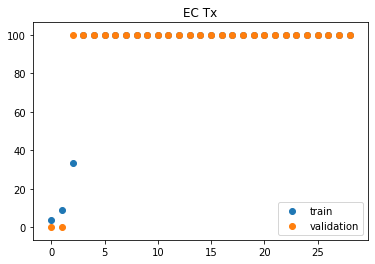

Training Accuracy (Throughput Tx):  100.0
Validation Accuracy (Throughput Tx):  100.0


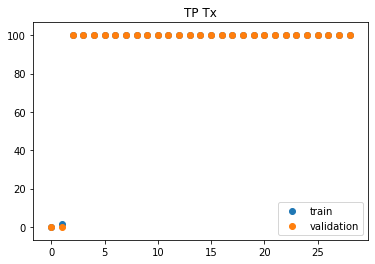

Training Accuracy (Delay Tx):  100.0
Validation Accuracy (Delay Tx):  100.0


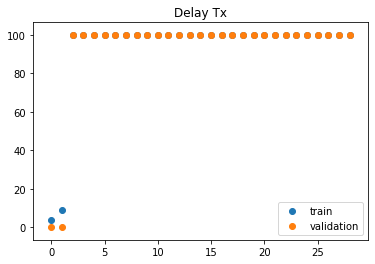

Training Accuracy (Ec No Tx):  100.0
Validation Accuracy(Ec No Tx):  100.0


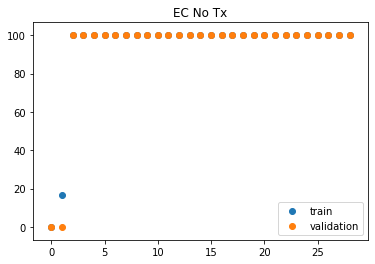

Training Accuracy (Delay No Tx):  100.0
Validation Accuracy (Delay No Tx):  100.0


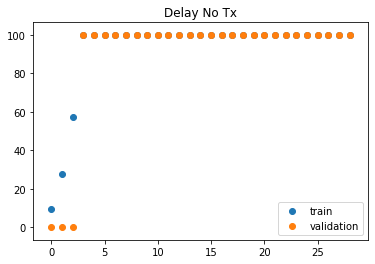

In [21]:
#Decision Tree

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = DecisionTree(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",max(ec_tx_acc_train))
print("Validation Accuracy (Ec Tx): ",max(ec_tx_acc_val))

plt.title('EC Tx')
plt.scatter(list(range(len(ec_tx_acc_train))),ec_tx_acc_train,label="train")
plt.scatter(list(range(len(ec_tx_acc_val))),ec_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()


#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = DecisionTree(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",max(tp_tx_acc_train))
print("Validation Accuracy (Throughput Tx): ",max(tp_tx_acc_val))   

plt.title('TP Tx')
plt.scatter(list(range(len(tp_tx_acc_train))),tp_tx_acc_train,label="train")
plt.scatter(list(range(len(tp_tx_acc_val))),tp_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = DecisionTree(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",max(ms_tx_acc_train))
print("Validation Accuracy (Delay Tx): ",max(ms_tx_acc_val))

plt.title('Delay Tx')
plt.scatter(list(range(len(ms_tx_acc_train))),ms_tx_acc_train,label="train")
plt.scatter(list(range(len(ms_tx_acc_val))),ms_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = DecisionTree(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",max(ec_no_tx_acc_train))
print("Validation Accuracy(Ec No Tx): ",max(ec_no_tx_acc_val))

plt.title('EC No Tx')
plt.scatter(list(range(len(ec_no_tx_acc_train))),ec_no_tx_acc_train,label="train")
plt.scatter(list(range(len(ec_no_tx_acc_val))),ec_no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = DecisionTree(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",max(ms_no_tx_acc_train))
print("Validation Accuracy (Delay No Tx): ",max(ms_no_tx_acc_val))

plt.title('Delay No Tx')
plt.scatter(list(range(len(ms_no_tx_acc_train))),ms_no_tx_acc_train,label="train")
plt.scatter(list(range(len(ms_no_tx_acc_val))),ms_no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

Training Accuracy (Ec Tx):  81.91
Validation Accuracy (Ec Tx):  0.0


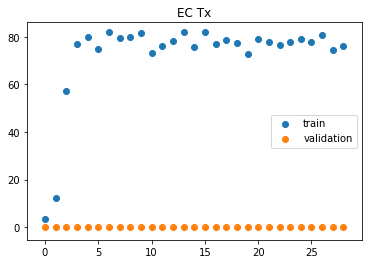

Training Accuracy (Throughput Tx):  84.42
Validation Accuracy (Throughput Tx):  100.0


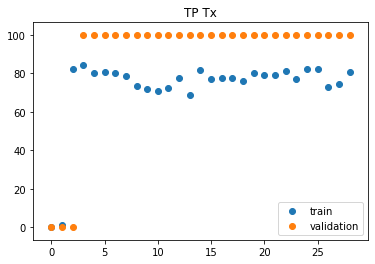

Training Accuracy (Delay Tx):  84.16
Validation Accuracy (Delay Tx):  0.0


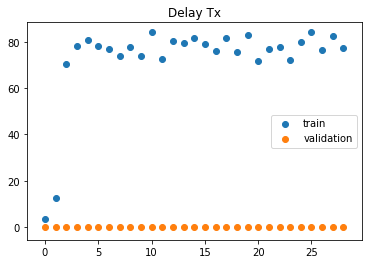

Training Accuracy (Ec No Tx):  86.16
Validation Accuracy(Ec No Tx):  100.0


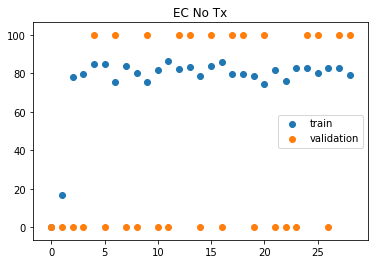

Training Accuracy (Delay No Tx):  78.26
Validation Accuracy (Delay No Tx):  0.0


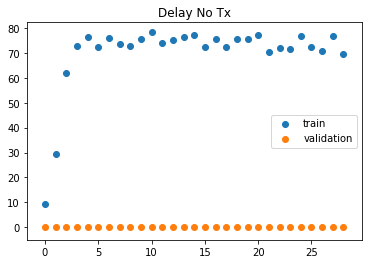

In [22]:
#Random Forest

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = RandomForest(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",max(ec_tx_acc_train))
print("Validation Accuracy (Ec Tx): ",max(ec_tx_acc_val))

plt.title('EC Tx')
plt.scatter(list(range(len(ec_tx_acc_train))),ec_tx_acc_train,label="train")
plt.scatter(list(range(len(ec_tx_acc_val))),ec_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()


#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = RandomForest(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",max(tp_tx_acc_train))
print("Validation Accuracy (Throughput Tx): ",max(tp_tx_acc_val))   

plt.title('TP Tx')
plt.scatter(list(range(len(tp_tx_acc_train))),tp_tx_acc_train,label="train")
plt.scatter(list(range(len(tp_tx_acc_val))),tp_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = RandomForest(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",max(ms_tx_acc_train))
print("Validation Accuracy (Delay Tx): ",max(ms_tx_acc_val))

plt.title('Delay Tx')
plt.scatter(list(range(len(ms_tx_acc_train))),ms_tx_acc_train,label="train")
plt.scatter(list(range(len(ms_tx_acc_val))),ms_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = RandomForest(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",max(ec_no_tx_acc_train))
print("Validation Accuracy(Ec No Tx): ",max(ec_no_tx_acc_val))

plt.title('EC No Tx')
plt.scatter(list(range(len(ec_no_tx_acc_train))),ec_no_tx_acc_train,label="train")
plt.scatter(list(range(len(ec_no_tx_acc_val))),ec_no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = RandomForest(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",max(ms_no_tx_acc_train))
print("Validation Accuracy (Delay No Tx): ",max(ms_no_tx_acc_val))

plt.title('Delay No Tx')
plt.scatter(list(range(len(ms_no_tx_acc_train))),ms_no_tx_acc_train,label="train")
plt.scatter(list(range(len(ms_no_tx_acc_val))),ms_no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

In [23]:
#Gradient Boosting 

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = GradientBoosting(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",ec_tx_acc_train)
print("Validation Accuracy (Ec Tx): ",ec_tx_acc_val)

#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = GradientBoosting(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",tp_tx_acc_train)
print("Validation Accuracy (Throughput Tx): ",tp_tx_acc_val)      
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = GradientBoosting(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",ms_tx_acc_train)
print("Validation Accuracy (Delay Tx): ",ms_tx_acc_val)

#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = GradientBoosting(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",ec_no_tx_acc_train)
print("Validation Accuracy(Ec No Tx): ",ec_no_tx_acc_val)

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = GradientBoosting(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",ms_no_tx_acc_train)
print("Validation Accuracy (Delay No Tx): ",ms_no_tx_acc_val)

Training Accuracy (Ec Tx):  99.98
Validation Accuracy (Ec Tx):  0.0
Training Accuracy (Throughput Tx):  99.98
Validation Accuracy (Throughput Tx):  0.0
Training Accuracy (Delay Tx):  99.98
Validation Accuracy (Delay Tx):  0.0
Training Accuracy (Ec No Tx):  99.82
Validation Accuracy(Ec No Tx):  0.0
Training Accuracy (Delay No Tx):  99.91
Validation Accuracy (Delay No Tx):  0.0


In [24]:
#Linear Regression 

#Energy Consumption Tx

ec_tx_acc_train,ec_tx_acc_val = LinRegression(ec_tx_x,ec_tx_y,validation_ec_tx_x,validation_ec_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec Tx): ",ec_tx_acc_train)
print("Validation Accuracy (Ec Tx): ",ec_tx_acc_val)

#Throughput Tx

tp_tx_acc_train,tp_tx_acc_val = LinRegression(tp_tx_x,tp_tx_y,validation_tp_tx_x,validation_tp_tx_y,multiple_outputs=False)
print("Training Accuracy (Throughput Tx): ",tp_tx_acc_train)
print("Validation Accuracy (Throughput Tx): ",tp_tx_acc_val)    
      
#Delay Tx
      
ms_tx_acc_train,ms_tx_acc_val = LinRegression(ms_tx_x,ms_tx_y,validation_ms_tx_x,validation_ms_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay Tx): ",ms_tx_acc_train)
print("Validation Accuracy (Delay Tx): ",ms_tx_acc_val)
      
#Energy Consumption No Tx

ec_no_tx_acc_train,ec_no_tx_acc_val = LinRegression(ec_no_tx_x,ec_no_tx_y,validation_ec_no_tx_x,validation_ec_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Ec No Tx): ",ec_no_tx_acc_train)
print("Validation Accuracy(Ec No Tx): ",ec_no_tx_acc_val)

#Delay No Tx

ms_no_tx_acc_train,ms_no_tx_acc_val = LinRegression(ms_no_tx_x,ms_no_tx_y,validation_ms_no_tx_x,validation_ms_no_tx_y,multiple_outputs=False)
print("Training Accuracy (Delay No Tx): ",ms_no_tx_acc_train)
print("Validation Accuracy (Delay No Tx): ",ms_no_tx_acc_val)

Training Accuracy (Ec Tx):  0.77
Validation Accuracy (Ec Tx):  0.0
Training Accuracy (Throughput Tx):  0.25
Validation Accuracy (Throughput Tx):  0.0
Training Accuracy (Delay Tx):  0.77
Validation Accuracy (Delay Tx):  0.0
Training Accuracy (Ec No Tx):  0.06
Validation Accuracy(Ec No Tx):  0.0
Training Accuracy (Delay No Tx):  4.32
Validation Accuracy (Delay No Tx):  0.0


Training Accuracy (Tx):  84.62
Validation Accuracy (Tx):  71.58


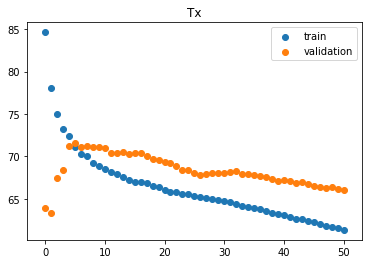

Training Accuracy (No Tx):  91.38
Validation Accuracy (No Tx):  84.88


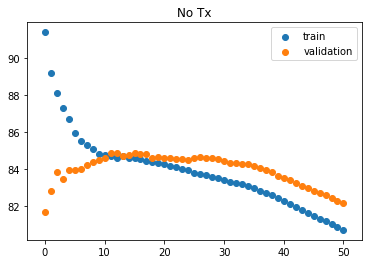

In [25]:
#Multi output Regression

#KNeighbours 

tx_acc_train,tx_acc_val = KNeighbors(tx_x,tx_y,validation_tx_x,validation_tx_y,multiple_outputs=True)
print("Training Accuracy (Tx): ",max(tx_acc_train))
print("Validation Accuracy (Tx): ",max(tx_acc_val))

plt.title('Tx')
plt.scatter(list(range(len(tx_acc_train))),tx_acc_train,label="train")
plt.scatter(list(range(len(tx_acc_val))),tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

no_tx_acc_train,no_tx_acc_val = KNeighbors(no_tx_x,no_tx_y,validation_no_tx_x,validation_no_tx_y,multiple_outputs=True)
print("Training Accuracy (No Tx): ",max(no_tx_acc_train))
print("Validation Accuracy (No Tx): ",max(no_tx_acc_val))

plt.title('No Tx')
plt.scatter(list(range(len(no_tx_acc_train))),no_tx_acc_train,label="train")
plt.scatter(list(range(len(no_tx_acc_val))),no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

Training Accuracy (Tx):  100.0
Validation Accuracy (Tx):  60.51


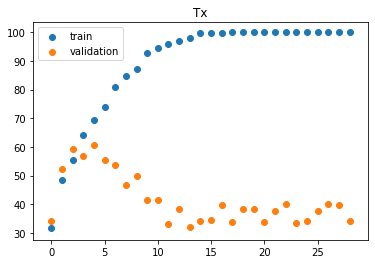

Training Accuracy (No Tx):  100.0
Validation Accuracy (No Tx):  82.44


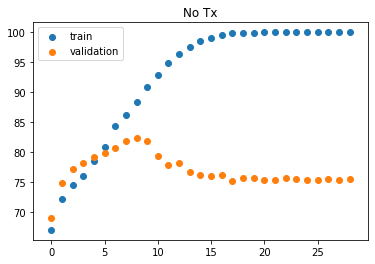

In [26]:
#Decistion Tree

tx_acc_train,tx_acc_val = DecisionTree(tx_x,tx_y,validation_tx_x,validation_tx_y,multiple_outputs=True)
print("Training Accuracy (Tx): ",max(tx_acc_train))
print("Validation Accuracy (Tx): ",max(tx_acc_val))

plt.title('Tx')
plt.scatter(list(range(len(tx_acc_train))),tx_acc_train,label="train")
plt.scatter(list(range(len(tx_acc_val))),tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

no_tx_acc_train,no_tx_acc_val = DecisionTree(no_tx_x,no_tx_y,validation_no_tx_x,validation_no_tx_y,multiple_outputs=True)
print("Training Accuracy (No Tx): ",max(no_tx_acc_train))
print("Validation Accuracy (No Tx): ",max(no_tx_acc_val))

plt.title('No Tx')
plt.scatter(list(range(len(no_tx_acc_train))),no_tx_acc_train,label="train")
plt.scatter(list(range(len(no_tx_acc_val))),no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

Training Accuracy (Tx):  94.08
Validation Accuracy (Tx):  68.16


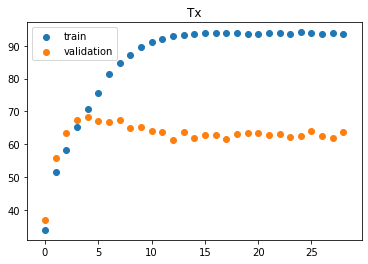

Training Accuracy (No Tx):  96.89
Validation Accuracy (No Tx):  83.07


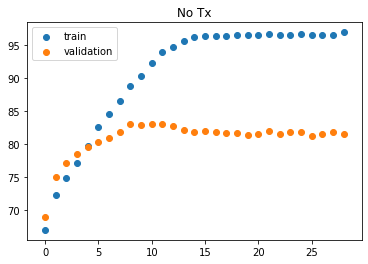

In [27]:
#Random Forest

tx_acc_train,tx_acc_val = RandomForest(tx_x,tx_y,validation_tx_x,validation_tx_y,multiple_outputs=True)
print("Training Accuracy (Tx): ",max(tx_acc_train))
print("Validation Accuracy (Tx): ",max(tx_acc_val))

plt.title('Tx')
plt.scatter(list(range(len(tx_acc_train))),tx_acc_train,label="train")
plt.scatter(list(range(len(tx_acc_val))),tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

no_tx_acc_train,no_tx_acc_val = RandomForest(no_tx_x,no_tx_y,validation_no_tx_x,validation_no_tx_y,multiple_outputs=True)
print("Training Accuracy (No Tx): ",max(no_tx_acc_train))
print("Validation Accuracy (No Tx): ",max(no_tx_acc_val))

plt.title('No Tx')
plt.scatter(list(range(len(no_tx_acc_train))),no_tx_acc_train,label="train")
plt.scatter(list(range(len(no_tx_acc_val))),no_tx_acc_val,label="validation")
plt.legend()
plt.plot()
plt.show()

In [28]:
#Gradient Boosting

tx_acc_train,tx_acc_val = GradientBoosting(tx_x,tx_y,validation_tx_x,validation_tx_y,multiple_outputs=True)
print("Training Accuracy (Tx): ",tx_acc_train)
print("Validation Accuracy (Tx): ",tx_acc_val)

no_tx_acc_train,no_tx_acc_val = GradientBoosting(no_tx_x,no_tx_y,validation_no_tx_x,validation_no_tx_y,multiple_outputs=True)
print("Training Accuracy (No Tx): ",no_tx_acc_train)
print("Validation Accuracy (No Tx): ",no_tx_acc_val)

Training Accuracy (Tx):  79.29
Validation Accuracy (Tx):  69.25
Training Accuracy (No Tx):  87.36
Validation Accuracy (No Tx):  82.82


In [29]:
#Linear Regression 

tx_acc_train,tx_acc_val = LinRegression(tx_x,tx_y,validation_tx_x,validation_tx_y,multiple_outputs=True)
print("Training Accuracy (Tx): ",tx_acc_train)
print("Validation Accuracy (Tx): ",tx_acc_val)

no_tx_acc_train,no_tx_acc_val = LinRegression(no_tx_x,no_tx_y,validation_no_tx_x,validation_no_tx_y,multiple_outputs=True)
print("Training Accuracy (No Tx): ",no_tx_acc_train)
print("Validation Accuracy (No Tx): ",no_tx_acc_val)

Training Accuracy (Tx):  40.48
Validation Accuracy (Tx):  43.28
Training Accuracy (No Tx):  20.68
Validation Accuracy (No Tx):  18.17
